# Tests of Association: linear regression, multivariate linear regression, generalized linear models

### Lesson Objectives: 
- linear regression
    - Statsmodels API and statsmodel formula API
    - Ordinary least squares method
    - Seaborn's linear model plot
- multivariate regression
    - Scikitlearn linearmodel library
- generalized linear models 
    - Statsmodels GLM library
and familirarity with topics such as 
- add column of ones to account for the constant term
- multicollinearity
- one-hot encoding

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [4]:
url = 'https://raw.githubusercontent.com/BME1478H/Winter2020class/master/data/world-data-gapminder.csv'
world_data = pd.read_csv(url)

## Linear regresion

Given two set of observations, X and Y, we want to test the hypothesis that the expected value of y is a linear function of x:

$$y = x* coef + intercept + \epsilon$$

where e is observation noise. or in other words y has a normal distribution by a mean value defined by a linear function of x and variance defined by the observation noise: 

$$\mu = x*coef + intercept$$

$$y = \mathcal{N}(\mu,\epsilon)$$

We will use the statsmodels module to:

1- Fit a linear model. We will use the simplest strategy, ordinary least squares (OLS), which is accessible through `sm.OLS` function. 

2 - test that coef is non zero.

Note: The different terms used for y are: endogenous variable, dependenant variable, predicted variable. 
and the different terms used for x are: exogenous variable, independent variable, explanatory or predictor variable. 



by visualizing our data we previously observed that there may be a positive correlation between `children_per_woman` and `child_mortality`. We use these two variables to test a linear regression: 

In [5]:
# what we observed preiously was in year 2014, a reminder: 
world_data_2014 = world_data.loc[world_data['year'] == 2014]

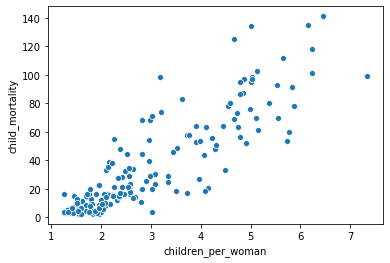

In [6]:
sns.scatterplot(x='children_per_woman', y='child_mortality', data=world_data_2014)

In [11]:
model = sm.OLS(world_data_2014.child_mortality, world_data_2014.children_per_woman)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:        child_mortality   R-squared (uncentered):                   0.825
Model:                            OLS   Adj. R-squared (uncentered):              0.824
Method:                 Least Squares   F-statistic:                              838.9
Date:                Sun, 22 Mar 2020   Prob (F-statistic):                    2.86e-69
Time:                        22:50:00   Log-Likelihood:                         -788.06
No. Observations:                 179   AIC:                                      1578.
Df Residuals:                     178   BIC:                                      1581.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [25]:
results.params

const                -26.356640
children_per_woman    20.818405
dtype: float64

you can use tab completion to explore other available results. 

we can plot our fitted linear regression

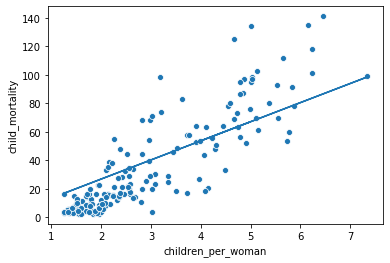

In [15]:
sns.scatterplot(x='children_per_woman', y='child_mortality', data=world_data_2014)
plt.plot(world_data_2014.children_per_woman,results.fittedvalues)

#### Adding the constant term to the model

This is not a good fit to the data. The reason is that an intercept is not included by default in this module. 
The intercept accounts for any bias that is not accounted for by the terms in the model. So our regression should also model a constant term. We can do that by adding a column of all ones to the independent variable x. Note that $a_0+a_1x_1+a_2x_2$ is the same as $[a_0,a_1,a_2]*[1,x_1,x_2]$, a_0 here is the intercept. The `statsmodels` has a function for this:

In [29]:
x = world_data_2014.children_per_woman
x = sm.add_constant(x);
x.head(5)

,const,children_per_woman
214,1.0,4.98
433,1.0,1.71
652,1.0,2.89
871,1.0,5.84
1090,1.0,2.08


                            OLS Regression Results                            
Dep. Variable:        child_mortality   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     589.3
Date:                Tue, 24 Mar 2020   Prob (F-statistic):           3.24e-58
Time:                        03:46:03   Log-Likelihood:                -750.48
No. Observations:                 179   AIC:                             1505.
Df Residuals:                     177   BIC:                             1511.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -26.3566      2

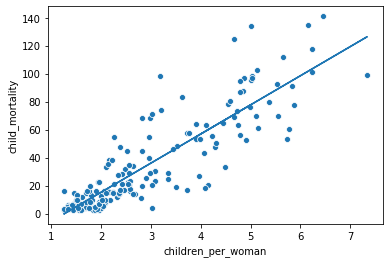

In [30]:
y = world_data_2014.child_mortality
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())


sns.scatterplot(x='children_per_woman', y='child_mortality', data=world_data_2014)
plt.plot(world_data_2014.children_per_woman,results.fittedvalues)

### The Statsmodels Formula API
Statsmodels also provides a formulaic interface that will be familiar to users of R and is more user friendly when working with Pandas dataframes. To use that interface you have to import the api to statsmodels, in which the class is now called ols rather than OLS. 

The argument formula allows you to specify the dependant and independent variables using the column names of the input dataframe. 

The "formula" we have below defines the columns we want to fit where the term on the left of the ~ is the dependant variable and the term on the right is the independant variable.

If you want to learn more about writing formulas, you can read more here:
https://www.statsmodels.org/stable/examples/notebooks/generated/formulas.html

In [32]:
import statsmodels.formula.api as smf

res = smf.ols(formula='child_mortality ~ children_per_woman', data=world_data_2014).fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:        child_mortality   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     589.3
Date:                Tue, 24 Mar 2020   Prob (F-statistic):           3.24e-58
Time:                        04:19:27   Log-Likelihood:                -750.48
No. Observations:                 179   AIC:                             1505.
Df Residuals:                     177   BIC:                             1511.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -26.3566      2

We get the same intercept and coeficients. 

Note that here the intercept is applied by default. 

### Linear regression with `Seaborn`

the linear model plot, `lmplot`, in `seaborn` basically does the same math and plots the fit 

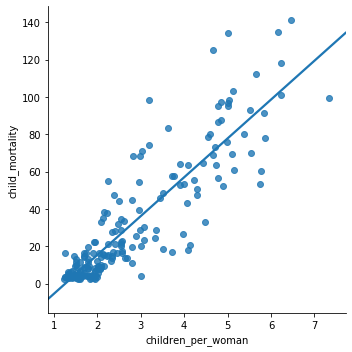

In [28]:
sns.lmplot(x='children_per_woman', y='child_mortality', ci=None, data=world_data_2014)

## Multivariate linear Regression: modeling trends

When multiple variables are associated with a response we have to include the relationship between the dependant variable and all the predictor factors in the formula: 

$$ y = a_0+ a_1x_1 + a_2x_2 + e $$

We use the famous Iris dataset for this section, which is a collection of petal and sepal length and widths for 50 flowers from the iris family. These flowers have been labeled for their species by botanists. 

In [67]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


if you visualize the relationship between the four measures, you can see that sepal and petal size
tend to be related which is intuitive as bigger flowers are bigger! but let's investigate if, in addition, there is a systematic effecto of species. 

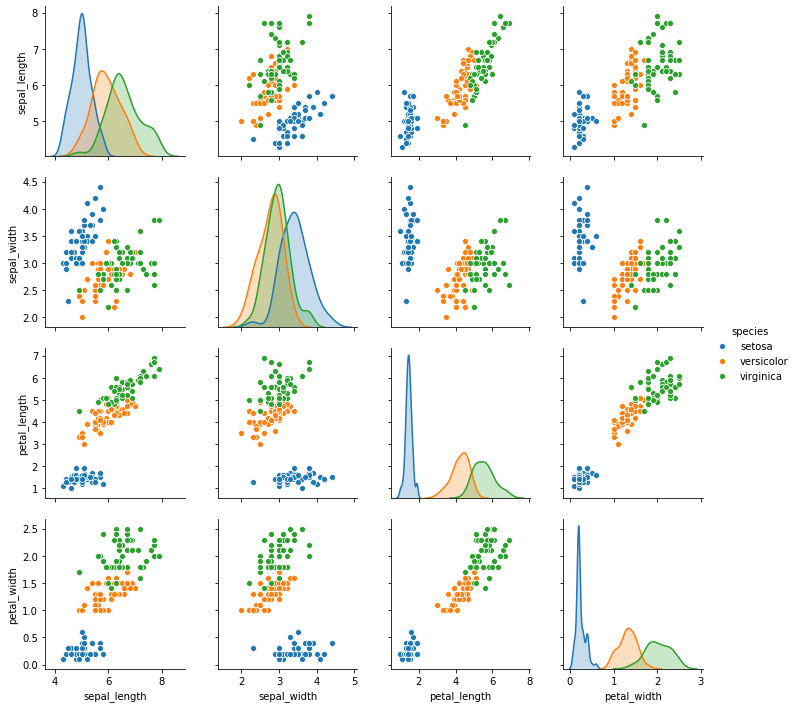

In [68]:
sns.pairplot(iris, hue='species');

we can use the formula OLS since we have the iris Panda dataset to call variables by column names. The only change here is that we are adding two columns to be included in the model:

In [76]:
resuls = smf.ols('sepal_length ~ species + petal_length', iris).fit()
print(resuls.summary())  

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     249.4
Date:                Mon, 23 Mar 2020   Prob (F-statistic):           3.10e-57
Time:                        23:06:57   Log-Likelihood:                -48.116
No. Observations:                 150   AIC:                             104.2
Df Residuals:                     146   BIC:                             116.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.68

#### Multicollinearity in data
Multicollinearity is when two or more variables are highly correlated, or in other terms one variable can be linearly predicted from the others. This can produce singularity of a model, meaning that while the model words as a whole, but the estimates may not be valid for individual predictor variables. 

The underlying assumption in regression analysis is that there is no multicollinearity in the predictor variables. With categorical variables, it is obvious that the last term is always redundant, e.g. In Iris dataset, if a sample is not Versicolor or Virginica, it is definitely labeld as Setosa).  
Therefore, the model omits one categorical variable.


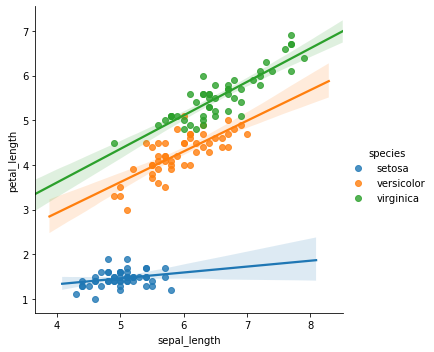

In [77]:
sns.lmplot('sepal_length','petal_length', hue = 'species', data=iris);

Let's quantify the relationship between child mortality and children per woman and income group variables that we have explored and visualized in the previous lessons:

In [80]:
resuls = smf.ols('child_mortality ~ children_per_woman + income_group', world_data_2014).fit()
print(resuls.summary()) 

                            OLS Regression Results                            
Dep. Variable:        child_mortality   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     171.4
Date:                Mon, 23 Mar 2020   Prob (F-statistic):           3.11e-59
Time:                        23:26:24   Log-Likelihood:                -738.67
No. Observations:                 179   AIC:                             1487.
Df Residuals:                     174   BIC:                             1503.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

You can see that the upper middle income factor does not have a significant contribution to the child mortality with the p value higher than 0.05. 

Here again the *high* income group is removed from the factors to avoid multicollinearity. 

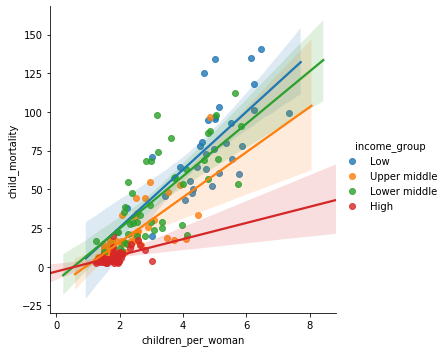

In [94]:
sns.lmplot('children_per_woman', y='child_mortality', hue = 'income_group', data=world_data_2014);

as a segue to machine learning, you can do the same multiple linear regression using `scikit-learn` machine learning package. However, we first have to convert our *categorical* variable income group to a numerical format acceptable by the algorithm. 

### One-hot encoding 
The process of converting categorical variables to binary variables where 1 represents the presence of the categorical variable and 0 the absence. In Pandas, `get dummies` functions performs the task. The name is taken from *dummy variables* which is an old name used for similar representation of categorical data in statistics.

an important note here is that, here we need to specify the need for dropping one category to avoid multicollinearity. This is done with setting `drop_first` argument to True. Again, you won't lose any information by this since the dataset can fully be explained by knowing the first three categories.

In [36]:
X = world_data_2014[['income_group','children_per_woman']]
X = pd.get_dummies(X, drop_first=True)
X.head()

,children_per_woman,income_group_Low,income_group_Lower middle,income_group_Upper middle
214,4.98,1,0,0
433,1.71,0,0,1
652,2.89,0,0,1
871,5.84,0,1,0
1090,2.08,0,0,0


In [37]:
from sklearn import linear_model

#X = world_data_2014[['income_group','children_per_woman']]
Y = world_data_2014['child_mortality']
regressor = linear_model.LinearRegression()
regressor.fit(X,Y)

print('Intercept: \n', regressor.intercept_)
print('Coefficients: \n', regressor.coef_)

Intercept: 
 -22.857713650406822
Coefficients: 
 [16.30165881 22.28751644 15.75593561  5.33785231]


We get the same intercept and coefficient as before (note for the change in the order)

# Generalized Linear models (GLM)

What if the expected value of *y* (the dependendant variable), is a nonlinear function of a linear combination of the predictor variables: 
$$ y = f(a_0+a_1x)+ \epsilon$$ 
or in other words:

$$ \mu = f(a_0+a_1x)$$
$$y = \mathcal{N}(\mu,\epsilon)$$

so while the predictors retain the *linear* combination, the expected value of y can be linked to them with a nonlinear function, hence, called *Generalized Linear* Models (GLM). Also, the probablity distribution of y can be any of the exponential family of distributions (e.g. Poisson, binomial, Gamma, etc.). 

The link function *f* can be an exponential for example:

$$y = e^{(a_0+a_1x)} + \epsilon$$

Such as the bacterial growth problem that we had in the beginning of the term (well, you can call it *Covid19 growth* now), that the expected value of the population size (y) had an exponential growth:

$$ E(y) = N_0e^{rt} $$

In [8]:
# let's simulate the exponential growth again:
rate = 0.4
N0 = 300

# generate the time data
t = np.arange(0,10.1,0.2)
# generate the population size, here we call it y
y_true = N0*np.exp(rate*t)
e = np.random.normal(0,250,len(t))
y = y_true + e
y[0] = N0

Let's first try to use the linear regression model.

if we take a log from both sides of the equation we will have:

$$ log(y) = log(N_0e^{rt})$$
$$ log(y) = log(N_0) + rt$$

So, the relationship between the log of y and the predictor, time, is linear. as shown in the below figure.



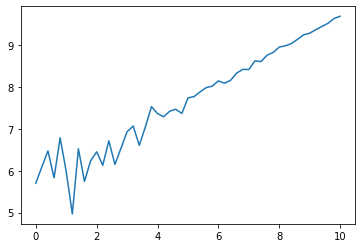

In [124]:
plt.plot(t,np.log(y),label="data");
#side note: you have probably also noticed that the charts for the Covid19 cases are plotted with a y axis log scale

so we can use the linear regression model between the log of y and the time as follows:

In [9]:
T = sm.add_constant(t);
bacteria_growth_model = sm.OLS(np.log(y),T)
bacteria_growth_result = bacteria_growth_model.fit()
print(bacteria_growth_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     476.4
Date:                Tue, 24 Mar 2020   Prob (F-statistic):           6.80e-27
Time:                        18:33:10   Log-Likelihood:                -23.768
No. Observations:                  51   AIC:                             51.54
Df Residuals:                      49   BIC:                             55.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6545      0.109     52.078      0.0

the rate is recovered correctly as 0.4 that we used in the model, and we expect the intercept to be ~$log(N_0)$

In [5]:
bacteria_growth_result.params

array([5.61682331, 0.41134475])

In [6]:
np.exp(bacteria_growth_result.params[0])

275.01435900698647

Instead of doing the conversion and using the linear regression, we could use the `GLM` modules in `statsmodels` package.
Here we assume that the observation noise is Gaussian, and we know that the link function is exponential identified as `log` in the package. 

In [10]:
model = sm.GLM(y,T, family=sm.families.Gaussian(link=sm.families.links.log()))
res = model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   51
Model:                            GLM   Df Residuals:                       49
Model Family:                Gaussian   Df Model:                            1
Link Function:                    log   Scale:                          59261.
Method:                          IRLS   Log-Likelihood:                -351.60
Date:                Tue, 24 Mar 2020   Deviance:                   2.9038e+06
Time:                        18:33:42   Pearson chi2:                 2.90e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7203      0.041    139.932      0.0

We can plot the results

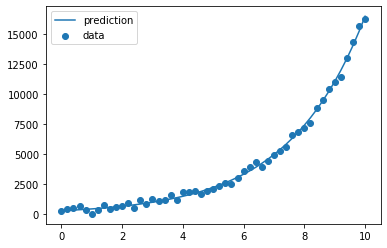

In [11]:
fig, ax = plt.subplots()
ax.scatter(t,y,label="data");
#ax.plot(t,y_true,label="true");
ax.plot(t,res.fittedvalues,label="prediction")
ax.legend(loc="best");

Now that we have the model, we can predict the population size for any time in the future:

In [22]:
# try time 10.2 (and don't forget the 1 for the constant term)
t_p = 10.2
print('population size at time', t_p, 'is', res.predict([1,t_p]))

population size at time 10.2 is [17581.90112661]


What we learned so far are all developed in the *statistics* field, and heavely adopted by today's machine learning applications. The main difference in machine learning is the focus to *predict* rather than describing as is the focus of statistics. 

In machine learning, we usually devide data training  and test sets. We find the model parametrs by fitting the model to the training data, and then find how the model performs on the test data. 

an even better approach is to use `cross-validation`: after putting the final test portion aside, divide your training dataset into N portions and loop over them, each time train on N-1 portions and leave one portion out for test, i.e. validation. 



you can find a list of best practices in using machine learning for biological research in this paper:
    https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5721660/pdf/13040_2017_Article_155.pdf